In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('nrg.csv')

<AxesSubplot:>

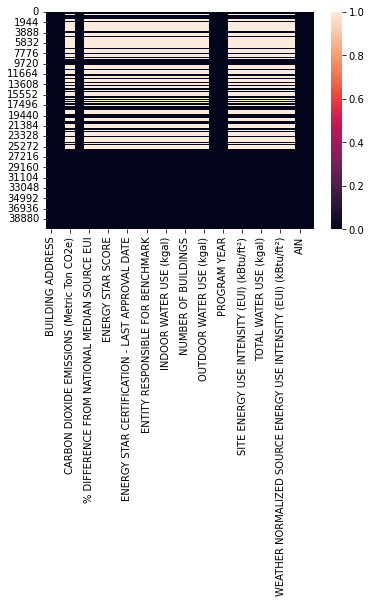

In [ ]:
# Plot 1
sns.heatmap(df.isnull())

In [ ]:
# Dropping Useless Columns
df = df.drop('POSTAL CODE', axis=1)
df = df.drop('ENERGY STAR CERTIFICATION - LAST APPROVAL DATE', axis = 1)
df = df.drop('LADBS Building Category', axis=1 )
df = df.drop('YEAR BUILT',axis=1 )
df = df.drop('ENERGY STAR CERTIFICATION - YEAR(S) CERTIFIED', axis=1)
df = df.drop('AIN', axis=1)
df = df.drop('PROGRAM YEAR', axis=1)
df = df.drop('BUILDING ID', axis=1)

In [ ]:
df = df.fillna(method ='bfill')

<AxesSubplot:>

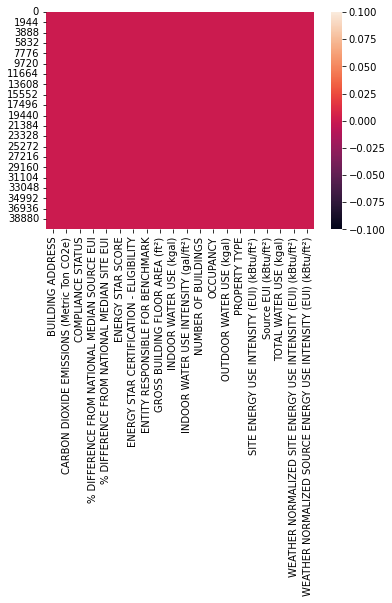

In [ ]:
# Plot 2
sns.heatmap(df.isnull())

In [ ]:
# Dropping More Useless Data
df = df.drop('INDOOR WATER USE (kgal)', axis=1)
df = df.drop('INDOOR WATER USE INTENSITY (gal/ft²)', axis=1)
df = df.drop('OUTDOOR WATER USE (kgal)', axis=1)

In [ ]:
df['% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI'] = df['% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI'].replace(['Not Available'],np.NaN)

In [ ]:
df_sample = df.sample(n=1000)

In [ ]:
df_sample_copy = df_sample

In [ ]:
column_names = list(df_sample_copy.columns)
df_shell = pd.DataFrame(columns = column_names)

In [ ]:
# Data Cleanup Algorithm: Removes all rows with non-numeric or logical values 
for ind, row in df_sample_copy.iterrows():
    count = 0
    for var in row:
        rowlist = list(row)
        not_count = 0
        count += 1
        
        if var == "Not Available":
            not_count += 1
        if count == 17 and not_count == 0:
            
            res = dict(zip(column_names, rowlist))
            df_shell = df_shell.append(res, ignore_index = True)

In [ ]:
df_shell

,BUILDING ADDRESS,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),COMPLIANCE STATUS,% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - ELIGIBILITY,ENTITY RESPONSIBLE FOR BENCHMARK,GROSS BUILDING FLOOR AREA (ft²),NUMBER OF BUILDINGS,OCCUPANCY,PROPERTY TYPE,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal),WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²)
0,324 N OAKHURST DR,51.2,NOT COMPLIED,-19.3,-19.3,65,No,"Vert Energy Group, Inc.",21944.0,1.0,100.0,Office,38.5,107.9,336.6,38.5,107.9
1,5955 DE SOTO AVE,293.7,COMPLIED,2.9,2.9,47,No,"Laskey-Weil Co., LLC",51295.0,1.0,90.0,Office,87.7,199.7,2501.5,88.1,197
2,14137 VANOWEN ST,534.0,NOT COMPLIED,-61.4,-61.4,Not Available,No,Allied Bevergaes,573698.0,2.0,100.0,Refrigerated Warehouse,15.5,47.6,1142.5,14.6,44.4
3,1714 MCCADDEN PL,594.9,NOT COMPLIED,-2.9,-2.9,55,No,Lincoln Property Company,249999.0,1.0,80.0,Multifamily Housing,37.3,79.5,13920.5,37.3,79.7
4,18300 VANOWEN ST,333.8,NOT COMPLIED,-81.1,-81.1,Not Available,No,"Vert Energy Group, Inc.",203657.0,1.0,100.0,Strip Mall,28.4,43.2,6980.8,28.4,43.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,19700 RINALDI ST,679.6,COMPLIED,150,150,Not Available,No,Shepherd of the Hills,164130.0,3.0,90.0,Worship Facility,63.1,146.1,8363.2,62.1,142.1
867,2801 E 12TH ST,37.9,COMPLIED,-43.5,-43.5,77,No,Stansport,71000.0,1.0,100.0,Distribution Center,7.7,20.4,63.2,7.8,20.5
868,1050 S GRAND AVE,641.2,NOT COMPLIED,204.7,204.7,3,No,Rancho Cold Storage,72270.0,1.0,100.0,Refrigerated Warehouse,146.6,410.5,5466.8,146.6,410.5
869,3333 W 4TH ST,1.5,COMPLIED,-98.7,-98.7,100.0,No,Fred Paulos Living Trust,62500.0,1.0,90.0,Multifamily Housing,0.3,1.0,4910.2,0.3,1.0


In [ ]:
df_shell_copy = pd.DataFrame(columns = column_names)
# Data Cleanup Algorithm: Removes all rows with non-numeric or logical values 
for ind, row in df_shell.iterrows():
    count = 0
    for var in row:
        rowlist = list(row)
        not_count = 0
        count += 1
        
        if var == "Not Available":
            not_count += 1
        if count == 17 and not_count == 0:
            
            res = dict(zip(column_names, rowlist))
            df_shell_copy = df_shell_copy.append(res, ignore_index = True)

In [ ]:
!pip install openpyxl==3.0.9

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
df_shell_copy.to_excel("output.xlsx")

In [ ]:
df_new = pd.read_excel('testing.xlsx') 

In [ ]:
# Algorithm that changes all non-numeric "numeric" data to numeric 
import numbers
for column in column_names:
    if isinstance(df_new[column][0], numbers.Number):
        continue
    elif isinstance(df_new[column][0], str):
        if df_new[column][0].isdigit():
            df_new[column] = pd.to_numeric(df_new[column])
            
    else:
        df_new[column] = pd.to_numeric(df_new[column])


In [ ]:

df_new.drop('ENTITY RESPONSIBLE FOR BENCHMARK', axis=1)
df_new.drop('BUILDING ADDRESS', axis=1)

'''
from pd.DataFrame import replace
newcol = df_new.loc[:,'COMPLIANCE STATUS']
for x in newcol:
    if (x == "COMPLIED")
'''

from pandas import get_dummies
newcol = get_dummies(df_new['COMPLIANCE STATUS'])


In [ ]:
df_new

,Unnamed: 0,BUILDING ADDRESS,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),COMPLIANCE STATUS,% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,ENERGY STAR CERTIFICATION - ELIGIBILITY,ENTITY RESPONSIBLE FOR BENCHMARK,GROSS BUILDING FLOOR AREA (ft²),NUMBER OF BUILDINGS,OCCUPANCY,PROPERTY TYPE,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal),WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²)
0,0,1500 S SEPULVEDA BLVD,85.3,COMPLIED,-51.0,-51.0,90.0,Yes,University Credit Union,28710,1,100,Bank Branch,42.2,118.1,444.2,42.1,117.8
1,1,5949 WHITSETT AVE,69.7,COMPLIED,-19.5,-19.5,85.0,Yes,"Mashcole Property Management, Inc.",30168,1,90,Multifamily Housing,39.6,69.3,1651.7,41.1,70.8
2,2,2500 W 4TH ST,117.5,COMPLIED,-30.1,-30.1,91.0,No,Abode Communities,42900,1,100,Multifamily Housing,46.5,75.8,2277.5,46.0,75.2
3,3,3790 WISCONSIN ST,63.1,NOT COMPLIED,-35.6,-35.6,95.0,Yes,John Stewart Company,26988,2,95,Multifamily Housing,40.0,63.8,1656.2,39.5,63.3
4,4,1000 WILSHIRE BLVD,2012.9,COMPLIED,-42.9,-42.9,90.0,No,Leading Edge Consulting Services LLC,490000,1,90,Office,47.3,148.7,7541.0,47.3,148.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,757,17941 DEVONSHIRE ST,174.9,COMPLIED,110.9,110.9,1.0,No,"Vert Energy Group, Inc.",22619,1,100,Multifamily Housing,139.3,179.8,1447.5,139.3,179.8
758,758,400 S HAUSER AVE,524.7,COMPLIED,-14.1,-14.1,71.0,No,"RealPage Utility Management, Inc.",192306,1,95,Multifamily Housing,47.8,75.6,6048.0,47.8,75.6
759,759,601 N ROSSMORE AVE,37.3,COMPLIED,-38.9,-38.9,96.0,No,Fred Paulos Living Trust,33500,1,95,Multifamily Housing,16.8,47.1,1370.4,16.8,47.1
760,760,1636 S BEVERLY GLEN BLVD,37.8,COMPLIED,-55.0,-55.0,NaN,No,The Bently,25163,1,100,Multifamily Housing,22.8,53.1,763.0,23.1,53.4


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(1.0, 50.0)

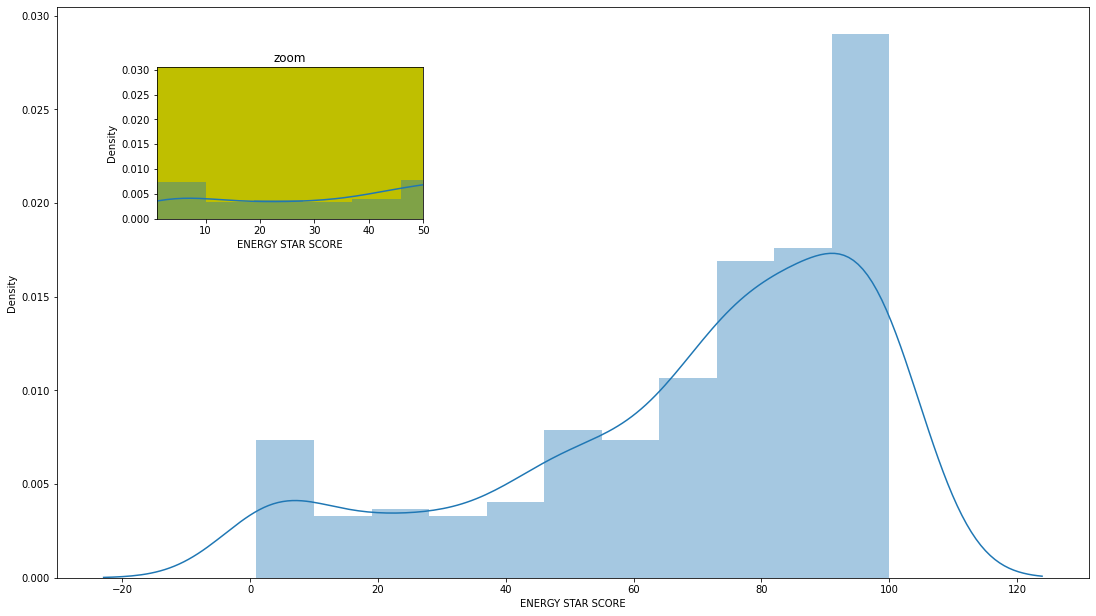

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.distplot(df_new["ENERGY STAR SCORE"], ax=ax)

ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.distplot(df_new["ENERGY STAR SCORE"], ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([1,50])

# Shows distribution of Energy Star Scores
# Confirms that a significant amount of data lies above the median Energy Star Score (50), but a significant lies below the median as well.

(0.0, 100.0)

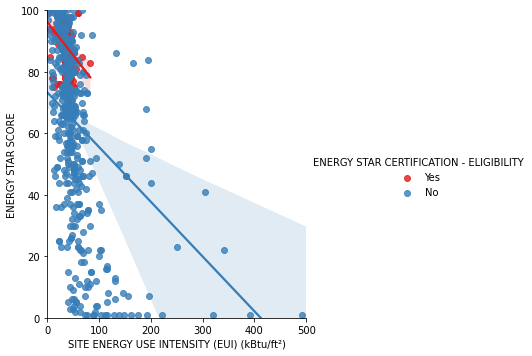

In [ ]:
plot = sns.lmplot(x="SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)", y="ENERGY STAR SCORE",hue="ENERGY STAR CERTIFICATION - ELIGIBILITY", palette="Set1",data=df_new)
axes = plot.axes
axes[0,0].set_xlim(0,500)
axes[0,0].set_ylim(0,100)

(0.0, 100.0)

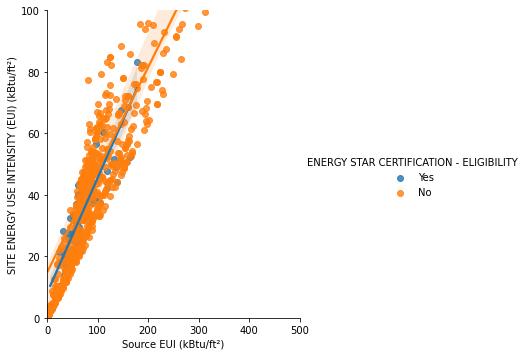

In [ ]:
plot = sns.lmplot(x="Source EUI (kBtu/ft²)", y="SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)",hue="ENERGY STAR CERTIFICATION - ELIGIBILITY",data=df_new)
axes = plot.axes
axes[0,0].set_xlim(0,500)
axes[0,0].set_ylim(0,100)

In [ ]:
# sns.set_theme(style="whitegrid", palette="muted")

# # Draw a categorical scatterplot to show each observation
# ax = sns.swarmplot(data=df_new, x="Source EUI (kBtu/ft²)", y="WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)")
# ax.set(ylabel="")

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


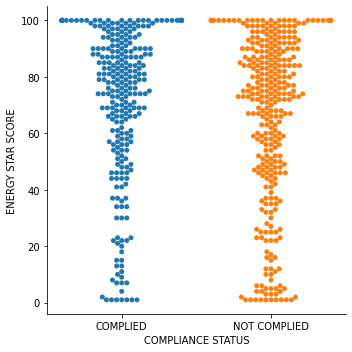

In [ ]:
sns.catplot(data=df_new, kind="swarm", x="COMPLIANCE STATUS", y="ENERGY STAR SCORE")


<AxesSubplot:xlabel='ENERGY STAR SCORE', ylabel='GROSS BUILDING FLOOR AREA (ft²)'>

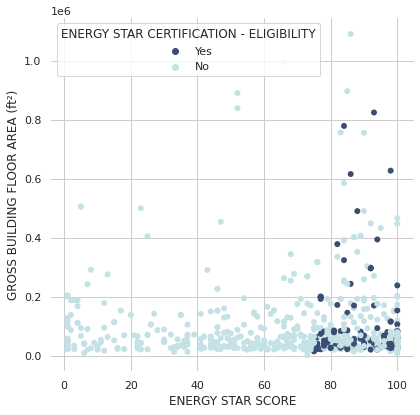

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="ENERGY STAR SCORE", y="GROSS BUILDING FLOOR AREA (ft²)",
                hue="ENERGY STAR CERTIFICATION - ELIGIBILITY", 
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df_new, ax=ax)



<AxesSubplot:xlabel='GROSS BUILDING FLOOR AREA (ft²)', ylabel='SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)'>

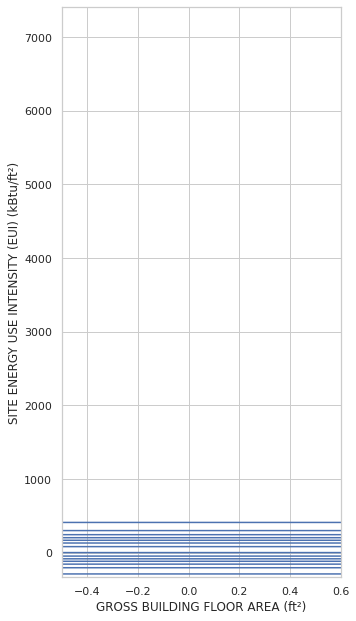

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax2 = plt.subplots()
fig.set_size_inches(5, 10.5)
# Set up the figure

#ax2.set_title('zoom')
ax2.set_xlim([-0.5,0.6])

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=df_new,
    x="GROSS BUILDING FLOOR AREA (ft²)",
    y="SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²)",
)

### Machine Learning

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
df_new.drop("ENTITY RESPONSIBLE FOR BENCHMARK", axis=1, inplace=True)
df_new.drop("BUILDING ADDRESS", axis=1, inplace=True)
df_new.drop("Unnamed: 0", axis=1, inplace=True)
df_new.drop("PROPERTY TYPE", axis=1, inplace=True)

In [ ]:
one_hot = pd.get_dummies(df_new['COMPLIANCE STATUS'])
df_new = df_new.drop('COMPLIANCE STATUS',axis = 1)
df_new = df_new.join(one_hot)

In [ ]:
df_new.drop("NOT COMPLIED", axis=1, inplace=True)

In [ ]:
one_hot = pd.get_dummies(df_new['ENERGY STAR CERTIFICATION - ELIGIBILITY'])
df_new = df_new.drop('ENERGY STAR CERTIFICATION - ELIGIBILITY',axis = 1)
df_new = df_new.join(one_hot)
df_new.drop("No", axis=1, inplace=True)


In [ ]:
df_new.drop("OCCUPANCY", axis=1, inplace=True)

In [ ]:
df_new

,CARBON DIOXIDE EMISSIONS (Metric Ton CO2e),% DIFFERENCE FROM NATIONAL MEDIAN SOURCE EUI,% DIFFERENCE FROM NATIONAL MEDIAN SITE EUI,ENERGY STAR SCORE,GROSS BUILDING FLOOR AREA (ft²),NUMBER OF BUILDINGS,SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),Source EUI (kBtu/ft²),TOTAL WATER USE (kgal),WEATHER NORMALIZED SITE ENERGY USE INTENSITY (EUI) (kBtu/ft²),WEATHER NORMALIZED SOURCE ENERGY USE INTENSITY (EUI) (kBtu/ft²),COMPLIED,Yes
0,85.3,-51.0,-51.0,90.0,28710,1,42.2,118.1,444.2,42.1,117.8,1,1
1,69.7,-19.5,-19.5,85.0,30168,1,39.6,69.3,1651.7,41.1,70.8,1,1
2,117.5,-30.1,-30.1,91.0,42900,1,46.5,75.8,2277.5,46.0,75.2,1,0
3,63.1,-35.6,-35.6,95.0,26988,2,40.0,63.8,1656.2,39.5,63.3,0,1
4,2012.9,-42.9,-42.9,90.0,490000,1,47.3,148.7,7541.0,47.3,148.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,174.9,110.9,110.9,1.0,22619,1,139.3,179.8,1447.5,139.3,179.8,1,0
758,524.7,-14.1,-14.1,71.0,192306,1,47.8,75.6,6048.0,47.8,75.6,1,0
759,37.3,-38.9,-38.9,96.0,33500,1,16.8,47.1,1370.4,16.8,47.1,1,0
760,37.8,-55.0,-55.0,NaN,25163,1,22.8,53.1,763.0,23.1,53.4,1,0


In [ ]:
df_test = df_new.drop('Yes', axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
for col in df_new.columns:
    imputer = imputer.fit(df_new[[col]])
    df_new[col] = imputer.transform(df_new[[col]])


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
y = df_new['Yes']
X = df_new.drop('Yes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree = tree.fit(X_train, y_train)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))

Accuracy: 0.851528384279476


In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
df_temp = df_new.drop("Yes", axis=1)
feature_cols = list(df_temp.columns)

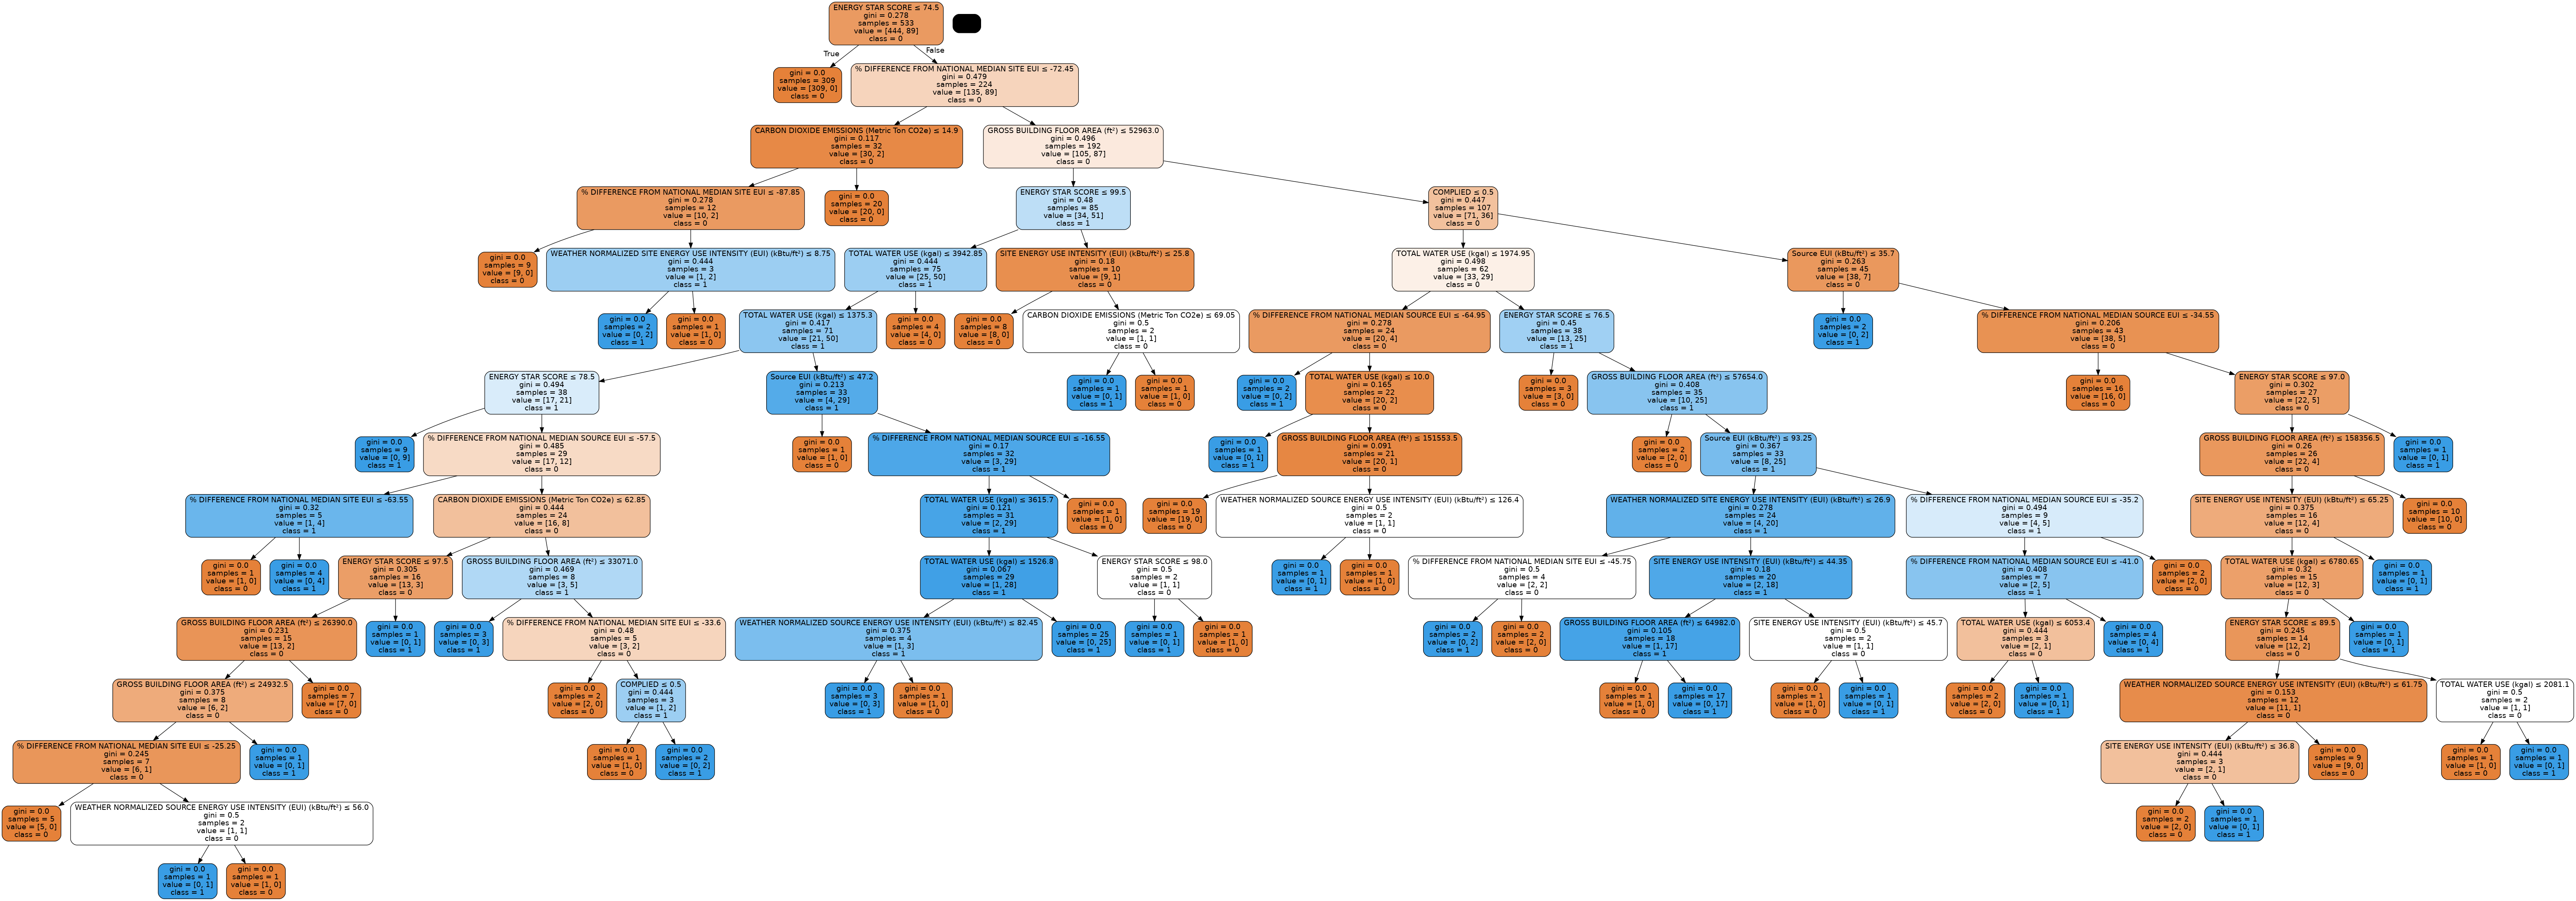

In [ ]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('energy_tree.png')
Image(graph.create_png())

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


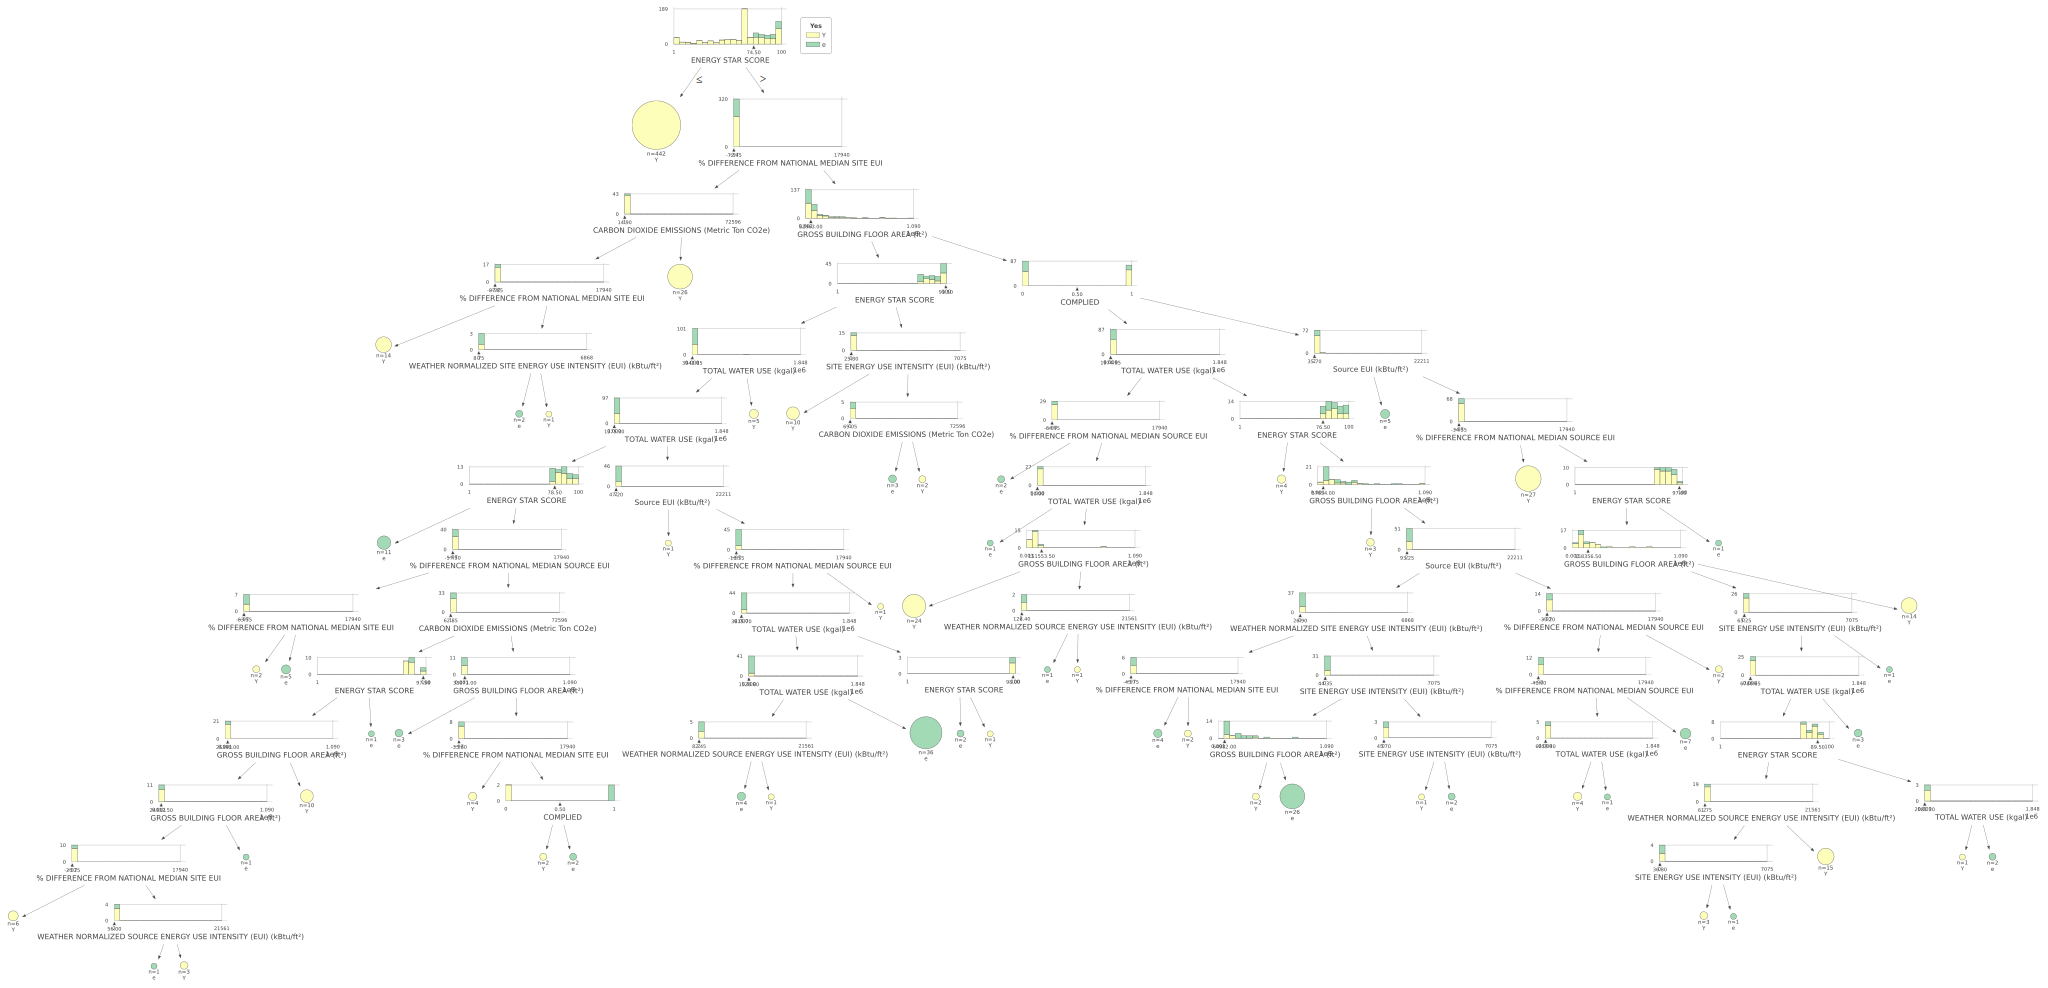

In [ ]:
viz = dtreeviz(tree, X, y,
                target_name="Yes",
                feature_names=feature_cols,
                class_names=list('Yes'))

viz

In [ ]:
viz.save("decision_tree.svg")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8077c578-f0e4-4000-b804-6670a4bf59f7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>